In [82]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import math
import csv
import re
import matplotlib.pyplot as plt

from dotenv import load_dotenv

### env variables

In [2]:
load_dotenv()

BASE_PATH = os.environ['BASE_PATH']
RESULTS_PATH = os.environ['RESULTS_PATH']
RANKINGS_PATH = os.environ['RANKINGS_PATH']
SPECIALITY_RANKINGS_PATH = os.environ['SPECIALITY_RANKINGS_PATH']
TEAMS_PATH = os.environ['TEAMS_PATH']
CALENDARS_PATH = os.environ['CALENDARS_PATH']
STARTLISTS_PATH = os.environ['STARTLISTS_PATH']
RACERESULTS_PATH = os.environ['RACERESULTS_PATH']
IMG_PATH = os.environ['IMG_PATH']
RIDERSTATS_PATH = os.environ['RIDERSTATS_PATH']
RACENAMES_PATH = os.environ['RACENAMES_PATH']

# Load data

In [3]:
rider_names = list(pd.read_csv(os.path.join(BASE_PATH, 'rider_names.csv')))

# Goals

- define type of rider in top 10 of classics

# Workflow

- cluster races by category (grand tour, classics, monuments, stage race, etc.)

# Modelling

In [41]:
def normalize_name(name):
    
    if len(name.split(' ')) == 2:
        
        return '-'.join(reversed(name.split(' '))).lower()
    
    else:
        
        first_name = name.split(' ')[-1]
        last_name = '-'.join(name.split(' ')[:-1])
        return (first_name + '-' + last_name).lower()

In [9]:
classics = ['amstel-gold-race', 'dwars-door-vlaanderen', 'e3-harelbeke', 'gent-wevelgem', 'la-fleche-wallone',
            'liege-bastogne-liege', 'omloop-het-nieuwsblad', 'paris-roubaix', 'ronde-van-vlaanderen']

In [47]:
year = '2021'

top_ten = []
for race_url in classics:
    
    df = pd.read_csv(os.path.join(RACERESULTS_PATH, 'uci_wt', race_url, year, 'race_results.csv'), encoding='utf-8')
    df_top_ten = df.loc[:9, ['Rider', 'Team']]
    df_top_ten['Rider'] = [rider.replace(team, '') for rider, team in zip(df_top_ten.Rider, df_top_ten.Team)]
    df_top_ten['Rider'] = [normalize_name(name) for name in df_top_ten.Rider]
    top_ten.append(df_top_ten['Rider'])

In [54]:
riders = list(set([item for sublist in top_ten for item in sublist]))

In [73]:
stats = []
for rider in riders:
    
    df_stats = pd.read_csv(os.path.join(RIDERSTATS_PATH, rider, 'stats-kpis-2022-04-02.csv'), encoding='utf-8')
    stats.append(df_stats[['Height▲▼', 'Weight▲▼']])

In [77]:
df_stats = pd.concat(stats).rename(columns={'Height▲▼': 'Height', 'Weight▲▼': 'Weight'})

[]

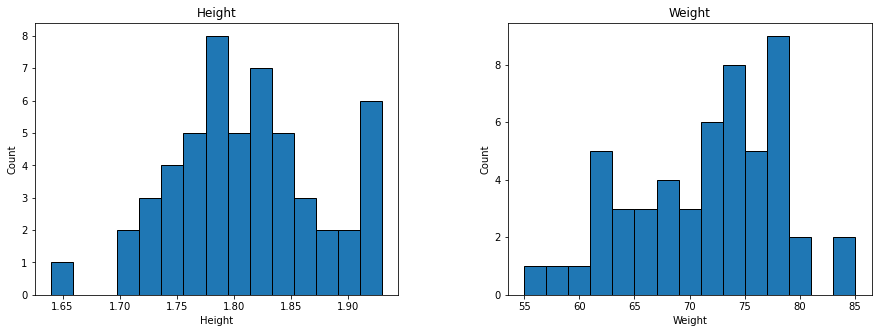

In [91]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
df_stats.hist('Height', bins=15, ec='k', grid=False, ax=ax[0])
df_stats.hist('Weight', bins=15, ec='k', grid=False, ax=ax[1])
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_xlabel('Height')
ax[1].set_xlabel('Weight')
plt.plot()